## Loan Application Status Prediction

### Problem Statement:
    
**This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.** 

Aim : Build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#Importing the libraries.
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('loan_prediction.csv')
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [2]:
data.shape

(614, 13)

We have 614 rows and 13 columns in the dataset.

In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have object, float and integer type of data in the dataset.

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Features in dataset(Independent Variable)

`Loan_ID` - Unique alpha numeric code for loan application identification

`Gender` - Gender of the loan applicant.

`Married` - Whether the applicant is married or not.

`Dependents` - No. of dependents of the applicant.

`Education` - Whether the loan applicant is graduated or not.('Graduate', 'Not Graduate')

`Self_Employed` - Whether the applicant is self employeed or not.

`ApplicantIncome` - Income of the applicant.

`CoapplicantIncome` - Income of coapplicant

`LoanAmount` - Amount of loan requested in thousands.

`Loan_Amount_Term` - Term of loan in months.

`Credit_History` - Credit history meeting the guidelines or not.(1,0,0.842199)

`Property_Area` - Location of property('Urban', 'Rural', 'Semiurban')

### Target in dataset(Dependent Variable)

`Loan_Status` - Whether the loan is approved or not(Y/N)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have 614 non null values in columns ['Loan_ID','Education', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area', 'Loan_status']. That means in rest of the columns there are null values.

Since the column 'Loan_ID' is only for identification purpose and don't have much impact on model building, we can drop this column from the dataset.

In [7]:
data.drop('Loan_ID',axis = 1, inplace = True)

### Exploring the categorical variables

In [8]:
#User defined function to print the categories in each categorical variables.

for i in data.columns:
    if data[i].dtypes =='object':
        print(i,'\n',data[i].unique())
        print('^'*50)

Gender 
 ['Male' 'Female' nan]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Married 
 ['No' 'Yes' nan]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Dependents 
 ['0' '1' '2' '3+' nan]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Education 
 ['Graduate' 'Not Graduate']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Self_Employed 
 ['No' 'Yes' nan]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Property_Area 
 ['Urban' 'Rural' 'Semiurban']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Loan_Status 
 ['Y' 'N']
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


### Checking for Missing Values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


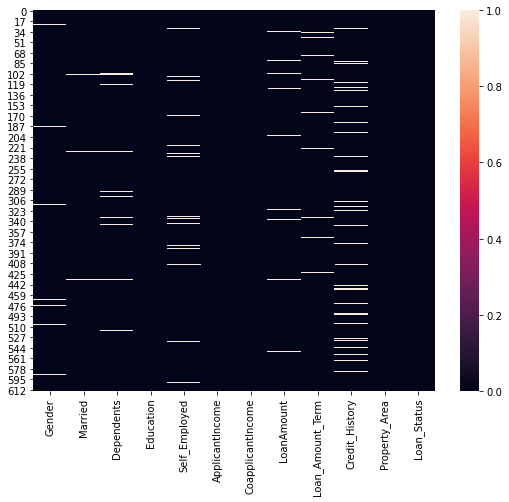

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[9,7])
sns.heatmap(data.isnull())
print(data.isnull().sum())

We have missing values in columns ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']. Let's replace the null values in these columns with imputation method.

In [10]:
#Imputing the mode value of a column for categorical data
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

In [11]:
import numpy as np
#imputing the mean value of a column for continuous data
data['LoanAmount'].fillna(np.mean(data['LoanAmount']),inplace = True)
data['Loan_Amount_Term'].fillna(np.mean(data['Loan_Amount_Term']),inplace = True)
data['Credit_History'].fillna(np.mean(data['Credit_History']),inplace = True)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


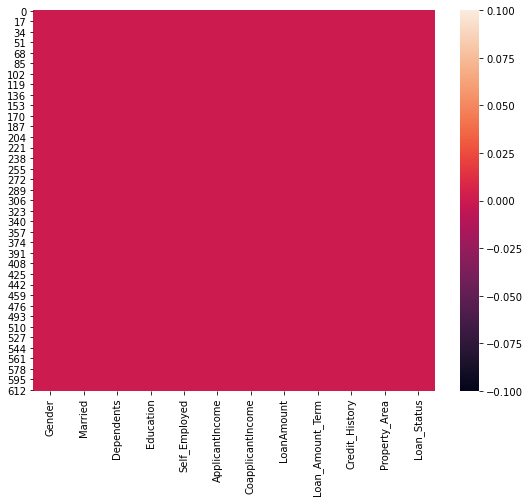

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[9,7])
sns.heatmap(data.isnull())
print(data.isnull().sum())

We have replaced the null values in the dataset with mean for continuous data and mode value for the categorical data.

### Data Visualization

### Univariate Analysis

In [13]:
#User defined function to plot the categorical variable using countplot
category_visualization = data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]
def count_plot(col):
    print(category_visualization[col].value_counts().sort_values(ascending = False))
    plt.figure(figsize = [12,4])
    sns.countplot(category_visualization[col])
    plt.xticks(rotation = 90)

Male      502
Female    112
Name: Gender, dtype: int64


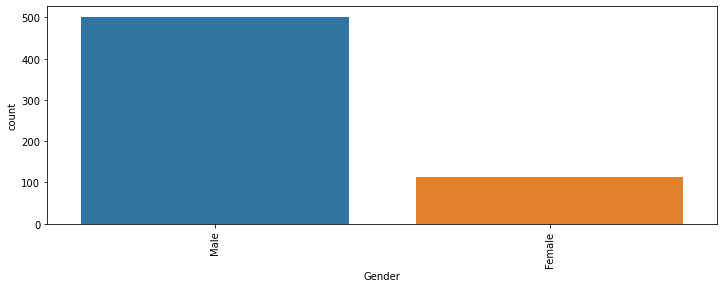

In [14]:
count_plot('Gender')

From the above observations, most of the applicants are males.

Yes    401
No     213
Name: Married, dtype: int64


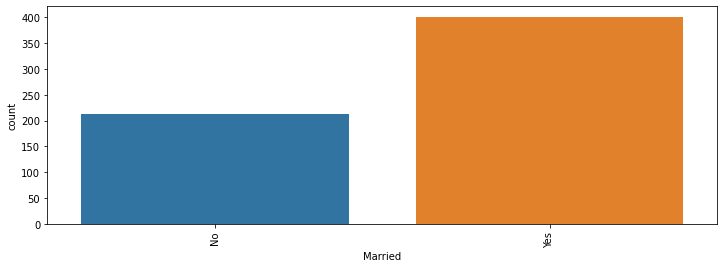

In [15]:
count_plot('Married')

From the above observations, most of the applicants are married.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


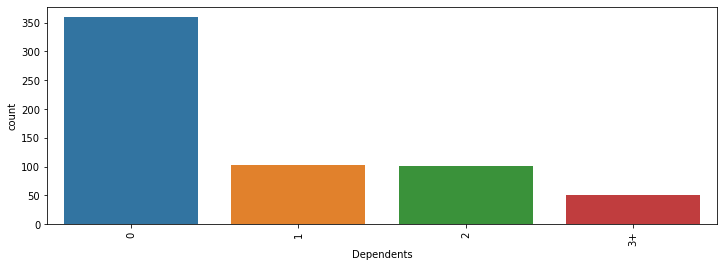

In [16]:
count_plot("Dependents")

From the above observations, most of the applicants have zero dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


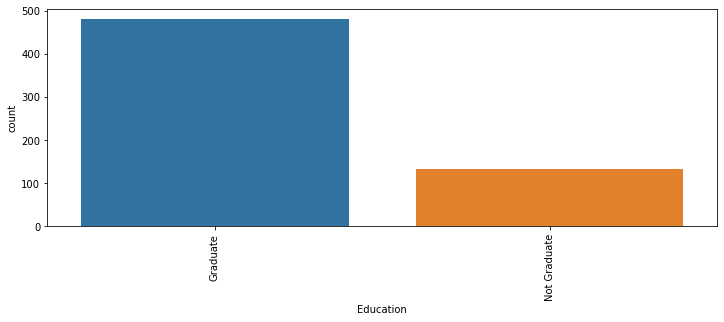

In [17]:
count_plot('Education')

From the above observations, most of the applicants are graduates.

No     532
Yes     82
Name: Self_Employed, dtype: int64


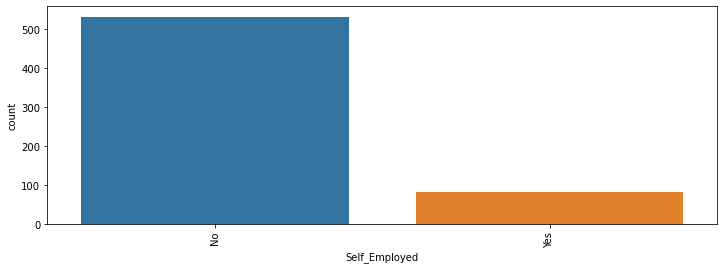

In [18]:
count_plot('Self_Employed')

From the above observations, most of the applicants are not self employed.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


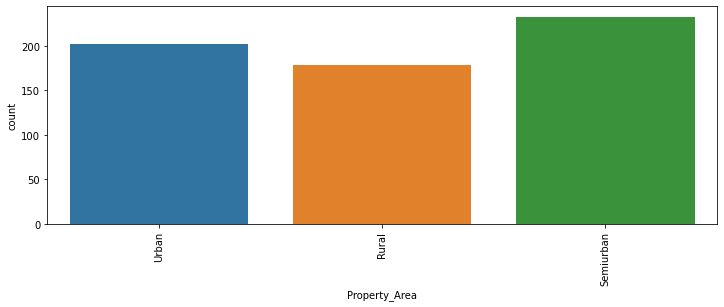

In [19]:
count_plot('Property_Area')

From the above observations, from all the types of property areas, almost equal number of applicants are there. But most number of applicants are having property area in semi urban area. 

Y    422
N    192
Name: Loan_Status, dtype: int64


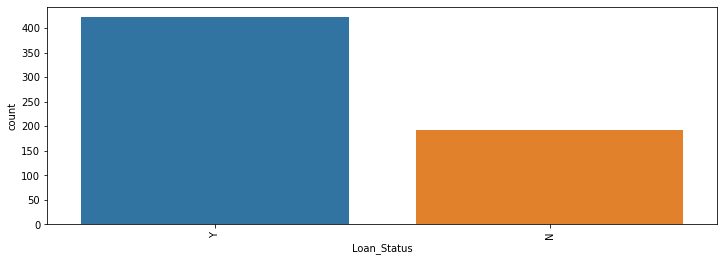

In [20]:
count_plot('Loan_Status')

From the above observations, most of the applicants have got the approval for the loan.

In [21]:
numeric_visualization = data.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis = 1)


def histogramplot(col):
    plt.figure(figsize=[4,4])
    sns.histplot(x =col,data = numeric_visualization,bins =6,kde=True)
    print(np.histogram(numeric_visualization[col],bins=6))

(array([581,  26,   4,   1,   1,   1], dtype=int64), array([  150., 13625., 27100., 40575., 54050., 67525., 81000.]))


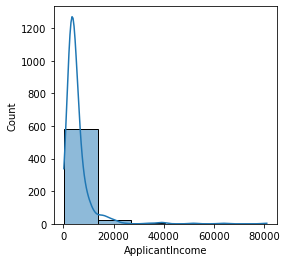

In [22]:
histogramplot('ApplicantIncome')

From the above observations, most of the applicants are having an income between the range of 150 to 13600.

(array([599,  11,   2,   0,   1,   1], dtype=int64), array([    0. ,  6944.5, 13889. , 20833.5, 27778. , 34722.5, 41667. ]))


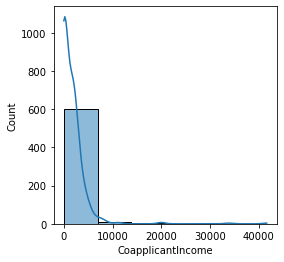

In [23]:
histogramplot('CoapplicantIncome')

From the above observations, most of the coapplicants are having an income between the range 0 to 6900.

(array([281, 275,  39,   7,   8,   4], dtype=int64), array([  9.        , 124.16666667, 239.33333333, 354.5       ,
       469.66666667, 584.83333333, 700.        ]))


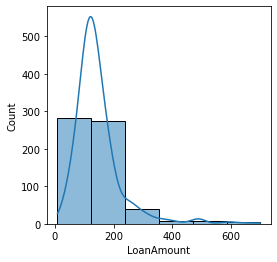

In [24]:
histogramplot('LoanAmount')

From the above observations, most of the applicants have requested for a loan amount between 9(thousand) to 239(thousand).

(array([  9,   3,  48,  13, 526,  15], dtype=int64), array([ 12.,  90., 168., 246., 324., 402., 480.]))


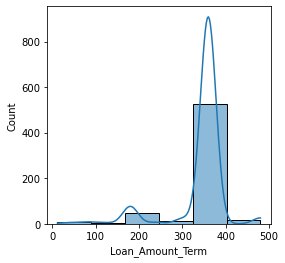

In [25]:
histogramplot("Loan_Amount_Term")

From the above observations, most of the applicants have selected a loan term between 325 to 402 months for repayment of loan.

(array([ 89,   0,   0,   0,   0, 525], dtype=int64), array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        ]))


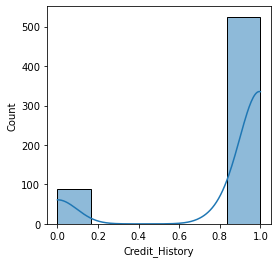

In [26]:
histogramplot('Credit_History')

From the above observations, most of the applicants are following the credit history guidelines.

#### Bivariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

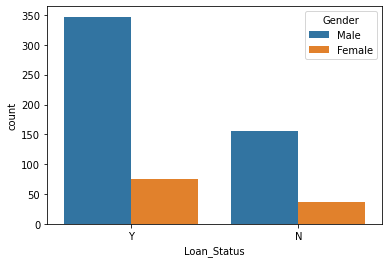

In [27]:
sns.countplot('Loan_Status',data = data, hue = 'Gender')

From the above observations, most of the loans got approved for male applicants.

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

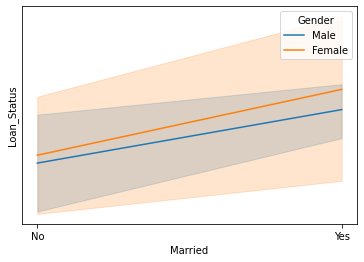

In [28]:
sns.lineplot('Married','Loan_Status',data = data,hue ='Gender')

From the above observations, most of the married applicants are getting the loan approved than the unmarried applicants.

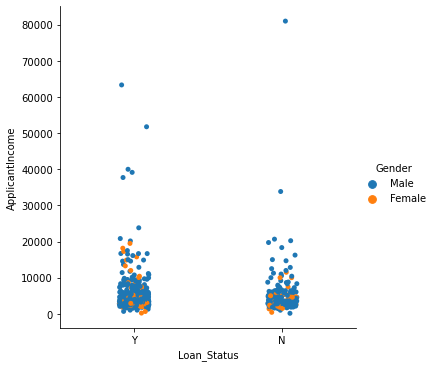

In [29]:
sns.catplot('Loan_Status','ApplicantIncome',data = data,hue = 'Gender')

From the above observations, most of the applicants who got the loan approved are having an income between the range 150-20000.

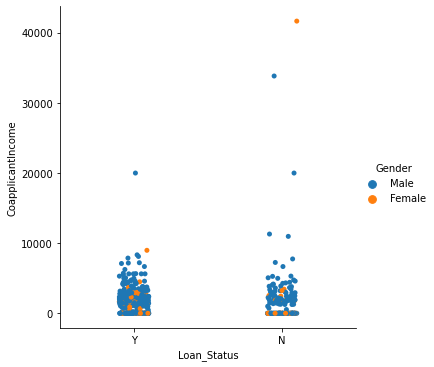

In [30]:
sns.catplot('Loan_Status','CoapplicantIncome',data = data,hue = 'Gender')

From the above observations, most of the applicants who got the loan approved are having the coapplicant with an income between the range 0 to 6000.

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

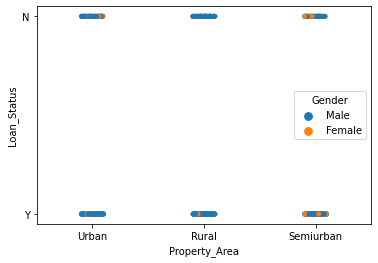

In [31]:
sns.stripplot('Property_Area','Loan_Status',data = data, hue='Gender')

From the above observations, loan was approved for applicants who are having property in urban, rural and semiurban areas almost equally.

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

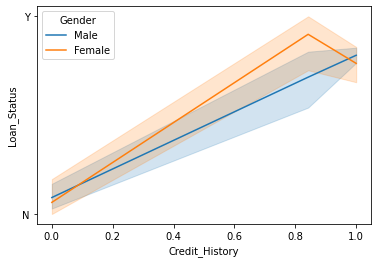

In [32]:
sns.lineplot('Credit_History','Loan_Status',data = data, hue='Gender')

From the above obseravtions, most of the applicants with good credit history got the loan approved.

### Encoding of Categorical data

In [33]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
onc = OrdinalEncoder()
lnc = LabelEncoder()

In [34]:
data.select_dtypes(object).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
data['Loan_Status'] = lnc.fit_transform(data['Loan_Status'].values.reshape(-1,1))    #Label encoding for target or label.

In [36]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = onc.fit_transform(data[i].values.reshape(-1,1)).astype('int64')    #Ordinal Encoding for the features.

In [37]:
data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int32
dtype: object

We have encoded all the categorical columns in the dataset.

### Statistical Summary

### Describe of the data

In [38]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

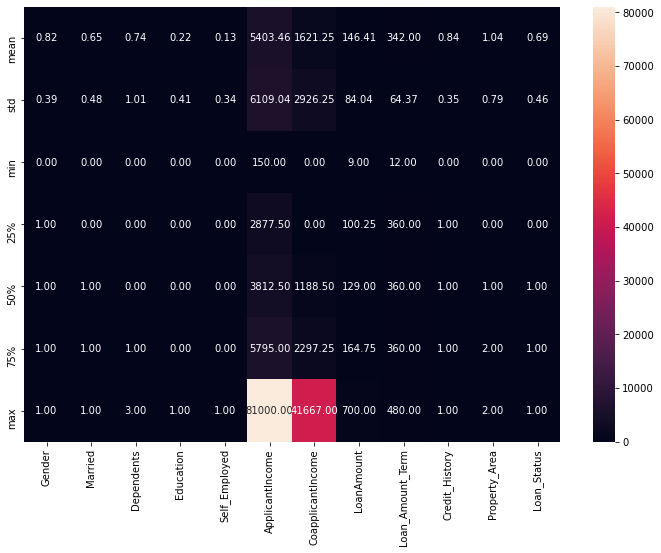

In [39]:
plt.figure(figsize=[12,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f')

#### Observations:

Except the columns **['Gender', 'Married', 'Loan_Term_Amount', 'Credit_History', 'Property_Area', 'Loan_Status']** all other columns are having higher mean value than the median. That means the data in these columns are having skewness in distribution.

There is a huge difference between the maximum value and the 75% for the columns **['ApplicantIncome', 'CoapplicantIncome']**. That means possible outliers are present in the data of these columns.

### Correlation

In [40]:
Correlation = data.corr()
Correlation

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<AxesSubplot:>

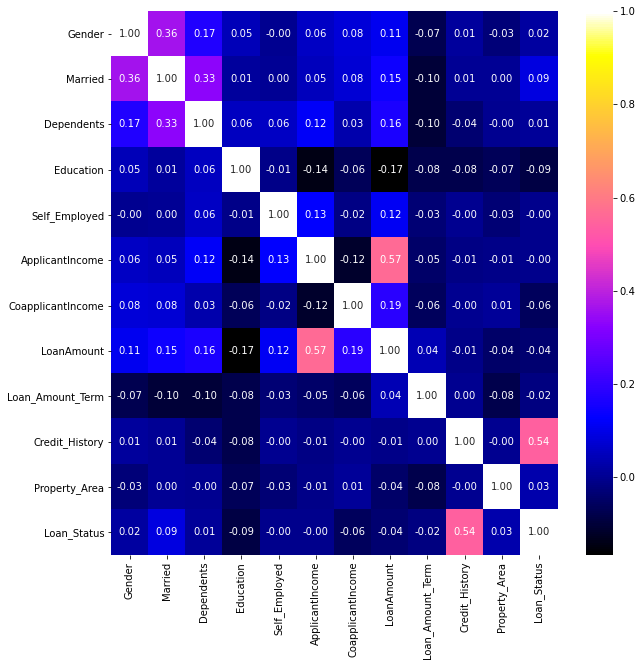

In [41]:
#Plotting the correlation of columns
plt.figure(figsize=[10,10])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='gnuplot2')

### Correlation with Target Column(Loan_Status)

Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64


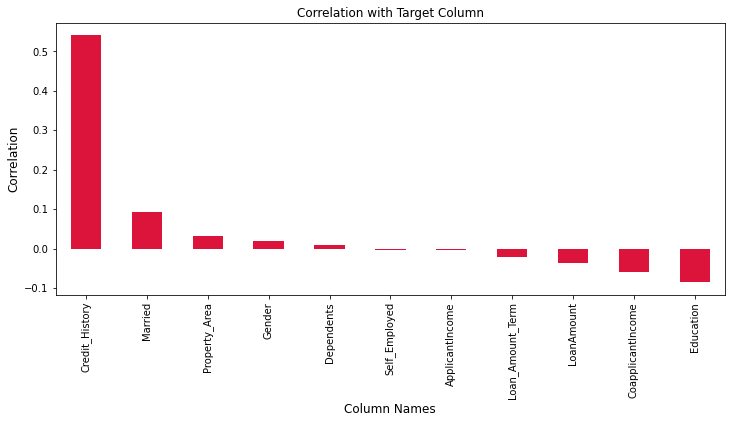

In [42]:
print(Correlation['Loan_Status'].drop('Loan_Status').sort_values(ascending = False))
plt.figure(figsize = [12,5])
Correlation['Loan_Status'].sort_values(ascending= False).drop('Loan_Status').plot(kind = 'bar', color ='crimson')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:
    
1. Except the columns **['Credit_History', 'Married', 'Property_Area', 'Gender', 'Dependents']** all other columns are having negative correlation to the targer variable **'Loan_Status'**.
2. The column **'Credit_History'** is having highest positve correlation with the target variable **'Loan_Status'**. The columm **'Education'** is having highest negative correlation with the target variable **'Loan_Status'**.
3. The column **'Dependents'** is having least positve correlation to the target variable **'Loan_Status'**. The column **'Self_Employed'** is having least negative correlation to the target variable **'Loan_Status'**.

### Distribution of data in columns(Checking skewness of data)

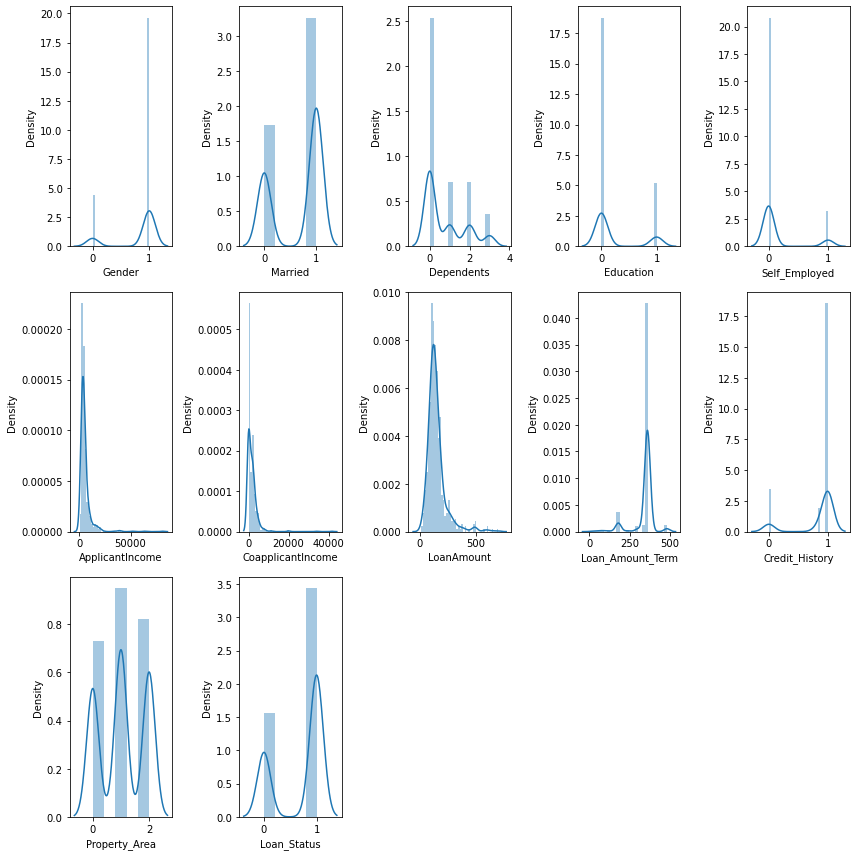

In [43]:
plt.figure(figsize = [12,12])
for i in range(0,len(data.columns.values)):
    plt.subplot(3,5,i+1)
    sns.distplot(data[data.columns.values[i]])
    plt.tight_layout()

The data is not normally distributed for all the columns. Skewness is present in all the columns.

### Skewness

In [44]:
Skewness = data.skew()
Skewness.sort_values(ascending = False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.726601
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Loan_Status         -0.809998
Gender              -1.648795
Credit_History      -1.963600
Loan_Amount_Term    -2.389680
dtype: float64

The columns **['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Self_Employed','Education', 'Dependents']** are having high positive skewness. The columns **['Loan_Amount_Term', 'Credit_History', 'Gender']** are having high negative skewness. We can ignore the encoded variables as they are categorical in nature and skewness irrelevant. 

### Checking the presence of outliers

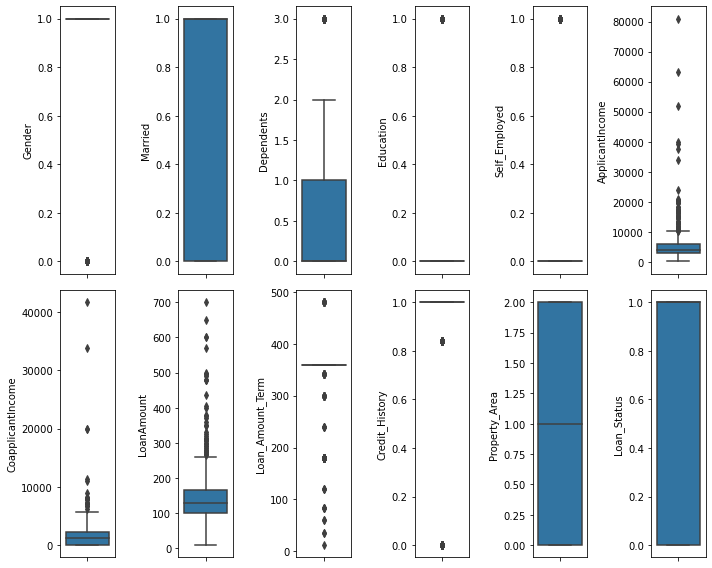

In [45]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [10,8])
for i in range(0,len(data.columns.values)):
    plt.subplot(2,6,i+1)
    sns.boxplot(y = data[data.columns.values[i]])
    plt.tight_layout()

From the above obseravtions, outliers are present in all the columns except columns **['Married', 'Property_Area', 'Loan_Status']**.

We can ignore the columns **['Gender', 'Dependents', 'Education', 'Self_Employed']** as these columns are having categorical data.

### Data Cleaning

### Checking whether the data is balanced or not

In [46]:
x = data.drop('Loan_Status',axis = 1)
y = data['Loan_Status']
print(x.shape)
print(y.shape)

(614, 11)
(614,)


1    422
0    192
Name: Loan_Status, dtype: int64


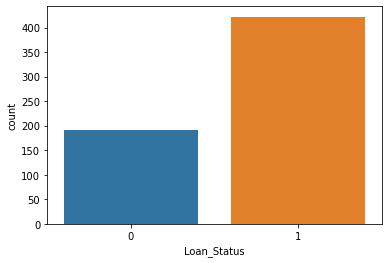

In [47]:
sns.countplot(y)
print(y.value_counts())

We have huge imbalance in the target data. The data for approved loan applicants are more in the dataset. We can reduce this imbalance of data.

In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
xtrainw, ytrainw = sm.fit_resample(x,y)
ytrainw

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

0    422
1    422
Name: Loan_Status, dtype: int64


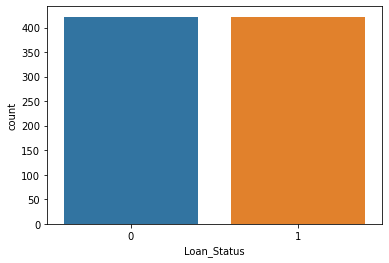

In [49]:
sns.countplot(ytrainw)
print(ytrainw.value_counts())

In [50]:
print(xtrainw.shape)
print(ytrainw.shape)

(844, 11)
(844,)


Now the data is balanced with equal distribution of data for approved and rejected loan applicants.

### Removing the Skewness

In [51]:
x = xtrainw.copy()
y = ytrainw.copy()
print(x.shape)
print(y.shape)

(844, 11)
(844,)


In [52]:
#We can set the skewness standard limit as +/-0.5.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

CoapplicantIncome    6.641948
ApplicantIncome      6.522410
LoanAmount           2.666405
Self_Employed        2.615412
Education            1.576958
Dependents           1.206591
Gender              -1.270562
Credit_History      -1.294502
Loan_Amount_Term    -2.504567
dtype: float64

These are the variables which are having high skewness which is beyond the standard limit. Let's remove the skewness for these columns. We can ignore the categorical columns ['Self_Employed', 'Education', 'Dependents', 'Gender'].

In [53]:
from sklearn.preprocessing import power_transform
#user defined function for removing skewness for columns which are beyond standard range
def rskew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))

In [54]:
rskew('CoapplicantIncome')
rskew('ApplicantIncome')
rskew('LoanAmount')
rskew('Credit_History')
rskew('Loan_Amount_Term')

In [55]:
x.skew().sort_values(ascending = False)

Self_Employed        2.615412
Education            1.576958
Dependents           1.206591
Loan_Amount_Term     0.469934
Property_Area        0.115358
LoanAmount           0.016739
CoapplicantIncome   -0.052482
ApplicantIncome     -0.114662
Married             -0.292688
Credit_History      -0.982857
Gender              -1.270562
dtype: float64

Since the column 'Credit_History' is still having high skewness than the standard limit, we can drop this column from the dataset.

In [56]:
x.drop(['Credit_History'],axis = 1, inplace = True)

In [57]:
x.skew().sort_values(ascending = False)

Self_Employed        2.615412
Education            1.576958
Dependents           1.206591
Loan_Amount_Term     0.469934
Property_Area        0.115358
LoanAmount           0.016739
CoapplicantIncome   -0.052482
ApplicantIncome     -0.114662
Married             -0.292688
Gender              -1.270562
dtype: float64

The skewness for the numerical data has been removed.

### Removing the Outliers

#### Using ZScore method

In [58]:
from scipy.stats import zscore
df = x.copy()
df['Loan_Status'] = y.copy()
df.drop(['Gender', 'Dependents', 'Education', 'Self_Employed','Loan_Status'],axis = 1, inplace = True)    #removing the categorical column from the dataset before removing outliers.
z = np.abs(zscore(df))
z

array([[1.15669795, 0.56948444, 1.04725357, 0.2352262 , 0.17670202,
        1.37409865],
       [0.86452993, 0.18370237, 0.81214151, 0.04914926, 0.17670202,
        1.20309971],
       [0.86452993, 0.51634371, 1.04725357, 1.42159256, 0.17670202,
        1.37409865],
       ...,
       [1.15669795, 0.09510281, 0.58308283, 0.72061469, 0.17670202,
        0.08549947],
       [1.15669795, 0.90591698, 1.04725357, 3.19445691, 0.17670202,
        1.37409865],
       [0.86452993, 0.32233281, 0.91605252, 0.06440776, 0.17670202,
        1.20309971]])

In [59]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new['Gender'] = x['Gender']
df_new['Dependents'] = x['Dependents']
df_new['Education'] = x['Education']
df_new['Self_Employed'] = x['Self_Employed']
df_new['Loan_Status'] = y.copy()
df_new

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Gender,Dependents,Education,Self_Employed,Loan_Status
0,0,0.569484,-1.047254,0.235226,0.176702,2,1,0,0,0,1
1,1,0.183702,0.812142,-0.049149,0.176702,0,1,1,0,0,0
2,1,-0.516344,-1.047254,-1.421593,0.176702,2,1,0,0,1,1
3,1,-0.772968,0.935123,-0.185017,0.176702,2,1,0,1,0,1
4,0,0.609095,-1.047254,0.155331,0.176702,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
838,1,-0.165937,0.992488,0.277939,0.176702,0,1,1,0,0,0
839,0,0.233314,-1.047254,-0.953078,0.112913,1,0,1,0,0,0
840,1,-0.847126,0.915419,0.488587,-1.277316,2,1,0,1,0,0
841,0,0.095103,0.583083,-0.720615,0.176702,1,0,0,0,0,0


In [60]:
df['Gender'] = x['Gender']
df['Dependents'] = x['Dependents']
df['Education'] = x['Education']
df['Self_Employed'] = x['Self_Employed']
df['Loan_Status'] = y.copy()
df.shape

(844, 11)

In [61]:
df_new.shape

(806, 11)

In [62]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

4.502369668246446

We are losing only 4.62% of data after removing outliers using zscore method.

#### Using Inter Quartile range method

In [63]:
x1 = x.drop(['Gender', 'Dependents', 'Education', 'Self_Employed'],axis = 1)
# 1st quantile

Q1=x.quantile(0.25)

# 3rd quantile
Q3=x.quantile(0.75)

# IQR
IQR=Q3 - Q1
df.drop(['Gender', 'Dependents', 'Education', 'Self_Employed','Loan_Status'],axis = 1,inplace = True)
df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [64]:
df_1['Gender'] = x['Gender']
df_1['Dependents'] = x['Dependents']
df_1['Education'] = x['Education']
df_1['Self_Employed'] = x['Self_Employed']
df_1['Loan_Status'] = y.copy()
df_1.shape

(619, 11)

In [65]:
df['Gender'] = x['Gender']
df['Dependents'] = x['Dependents']
df['Education'] = x['Education']
df['Self_Employed'] = x['Self_Employed']
df['Loan_Status'] = y.copy()
df.shape

(844, 11)

In [66]:
data_loss = (df.shape[0]-df_1.shape[0])/df.shape[0]*100
data_loss

26.658767772511847

We are losing 28.67% of data after removing outliers using IQR method which is a huge loss of data. So we can stick to the ZScore method as it is losing only 4.62% of data after removing outliers.

### Checking the Multicolinearity of variables in the dataframe

In [67]:
x = df_new.drop('Loan_Status',axis = 1)
y = df_new['Loan_Status']
c = x.columns
print(x.shape)
print(y.shape)

(806, 10)
(806,)


In [68]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)
x

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Gender,Dependents,Education,Self_Employed
0,-1.155955,0.670973,-1.050256,0.267667,0.320898,1.384721,0.549636,-0.688597,-0.48795,-0.336541
1,0.865086,0.220837,0.810509,-0.047979,0.320898,-1.189870,0.549636,0.380785,-0.48795,-0.336541
2,0.865086,-0.595989,-1.050256,-1.571339,0.320898,1.384721,0.549636,-0.688597,-0.48795,2.971408
3,0.865086,-0.895421,0.933580,-0.198788,0.320898,1.384721,0.549636,-0.688597,2.04939,-0.336541
4,-1.155955,0.717191,-1.050256,0.178986,0.320898,1.384721,0.549636,-0.688597,-0.48795,-0.336541
...,...,...,...,...,...,...,...,...,...,...
801,0.865086,-0.187129,0.990988,0.315076,0.320898,-1.189870,0.549636,0.380785,-0.48795,-0.336541
802,-1.155955,0.278725,-1.050256,-1.051306,0.238780,0.097426,-1.819385,0.380785,-0.48795,-0.336541
803,0.865086,-0.981951,0.913862,0.548888,-1.550910,1.384721,0.549636,-0.688597,2.04939,-0.336541
804,-1.155955,0.117457,0.581281,-0.793280,0.320898,0.097426,-1.819385,-0.688597,-0.48795,-0.336541


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [70]:
calc_vif(x)

,Column Name,VIF Factor
0,Married,1.456350
1,ApplicantIncome,1.916485
2,CoapplicantIncome,1.722015
3,LoanAmount,1.696635
4,Loan_Amount_Term,1.057594
5,Property_Area,1.036199
6,Gender,1.271773
7,Dependents,1.183963
8,Education,1.070358
9,Self_Employed,1.051367


We don't have much variance of inflation for the variables in the dataset which is a good sign that there is no multicolinearity between the variables in the dataset.

In [71]:
#Steps performed till now
#1. Loaded the data
#2. Checked shape(rows and columns), data types, count of unique values in each columns.
#3. Features(Independent) and target(dependent) in the dataset
#4. Explored non-null values and unique values in categorical variables.
    #dropped column 'Loan_ID' as it is used just for identification purpose.
#5. Checked for missing values
#6. Imputed mean value for missing value in continuous variable and mode value in categorical variable
#7. Data visualization
    #Univariate analysis - Using histogramplot, countplot
    #Bivariate analysis - lineplot, catplot, stripplot
#8. Encoded the categorical data in variables.
    #Label encoding - for target variable 
    #Ordinal Encoding for categorical features.  
#Statistical Summary
#9. Describe of the data
#10.Correlation
#11. Correlation with target variable
#12. Checked distribution of data in columns(Checking skewness of data)
#13. Checked skewness of data
#14. Checked presense of outliers
#Data Cleansing
#15. Checked and removed imbalance of data
#16. Removed the Skewness of data
    #Dropped columns ['Credit_History'] as there was huge skewness present in the data of the variables
#17. Removed outliers using Zscore and IQR method in which the Zscore method found to be best since it was incurring less data 
    #loss after revmoing outliers.
#18. Checked for multicolinearity

### EDA Completed

### Building the Model - Classification

#### Splitting the data into features and target

In [75]:
features = x.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(806, 10)
(806,)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
estimator = [('LR', LogisticRegression()),
             ('KNN',KNeighborsClassifier()),
             ('SVR', SVC(gamma='auto')),
             ('DTC',DecisionTreeClassifier()),
             ('RFC',RandomForestClassifier(n_estimators=100))]
vtc = VotingClassifier(estimators = estimator)
sgdc = SGDClassifier()
etc = ExtraTreesClassifier()
xgbc = XGBClassifier()

#### Finding the best random_state

In [78]:
#User defined function for finding the best random state
def best_ran(model):
    maxAcc = 0
    maxRs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = accuracy_score(target_test,pred_test)
        if acc>maxAcc:
            maxAcc = acc
            maxRs = i
    print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

In [79]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    print("Accuracy Score is ",accuracy_score(target_test,pred_test))
    print(confusion_matrix(target_test,pred_test))
    print(classification_report(target_test,pred_test))

#### LogisticRegression

In [80]:
best_ran(lr)

LogisticRegression()
At random state  13 the model is having accuracy score of  0.691358024691358


In [81]:
mod_test(lr,13)

LogisticRegression()
Accuracy Score is  0.691358024691358
[[58 21]
 [29 54]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        79
           1       0.72      0.65      0.68        83

    accuracy                           0.69       162
   macro avg       0.69      0.69      0.69       162
weighted avg       0.69      0.69      0.69       162



#### KNeighborsClassifier

In [82]:
best_ran(knn)

KNeighborsClassifier()
At random state  15 the model is having accuracy score of  0.691358024691358


In [83]:
mod_test(knn,15)

KNeighborsClassifier()
Accuracy Score is  0.691358024691358
[[53 21]
 [29 59]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        74
           1       0.74      0.67      0.70        88

    accuracy                           0.69       162
   macro avg       0.69      0.69      0.69       162
weighted avg       0.70      0.69      0.69       162



#### DecisionTreeClassifier

In [84]:
best_ran(dtc)

DecisionTreeClassifier()
At random state  75 the model is having accuracy score of  0.7654320987654321


In [85]:
mod_test(dtc,75)

DecisionTreeClassifier()
Accuracy Score is  0.7716049382716049
[[62 19]
 [18 63]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        81
           1       0.77      0.78      0.77        81

    accuracy                           0.77       162
   macro avg       0.77      0.77      0.77       162
weighted avg       0.77      0.77      0.77       162



#### GaussianNB

In [86]:
best_ran(gnb)

GaussianNB()
At random state  15 the model is having accuracy score of  0.6851851851851852


In [87]:
mod_test(gnb,15)

GaussianNB()
Accuracy Score is  0.6851851851851852
[[55 19]
 [32 56]]
              precision    recall  f1-score   support

           0       0.63      0.74      0.68        74
           1       0.75      0.64      0.69        88

    accuracy                           0.69       162
   macro avg       0.69      0.69      0.69       162
weighted avg       0.69      0.69      0.69       162



#### RandomForestClassifier

In [88]:
best_ran(rfc)

RandomForestClassifier()
At random state  75 the model is having accuracy score of  0.8148148148148148


In [89]:
mod_test(rfc,75)

RandomForestClassifier()
Accuracy Score is  0.7962962962962963
[[66 15]
 [18 63]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        81
           1       0.81      0.78      0.79        81

    accuracy                           0.80       162
   macro avg       0.80      0.80      0.80       162
weighted avg       0.80      0.80      0.80       162



#### AdaBoostClassifier

In [90]:
best_ran(abc)

AdaBoostClassifier()
At random state  83 the model is having accuracy score of  0.7098765432098766


In [91]:
mod_test(abc,83)

AdaBoostClassifier()
Accuracy Score is  0.7098765432098766
[[64 26]
 [21 51]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        90
           1       0.66      0.71      0.68        72

    accuracy                           0.71       162
   macro avg       0.71      0.71      0.71       162
weighted avg       0.71      0.71      0.71       162



#### GradientBoostingClassifier

In [92]:
best_ran(gbc)

GradientBoostingClassifier()
At random state  72 the model is having accuracy score of  0.7407407407407407


In [93]:
mod_test(gbc,72)

GradientBoostingClassifier()
Accuracy Score is  0.7407407407407407
[[63 21]
 [21 57]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        84
           1       0.73      0.73      0.73        78

    accuracy                           0.74       162
   macro avg       0.74      0.74      0.74       162
weighted avg       0.74      0.74      0.74       162



#### VotingClassifier

In [94]:
best_ran(vtc)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVR', SVC(gamma='auto')),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())])
At random state  15 the model is having accuracy score of  0.7654320987654321


In [95]:
mod_test(vtc,15)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVR', SVC(gamma='auto')),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())])
Accuracy Score is  0.7777777777777778
[[61 13]
 [23 65]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        74
           1       0.83      0.74      0.78        88

    accuracy                           0.78       162
   macro avg       0.78      0.78      0.78       162
weighted avg       0.78      0.78      0.78       162



#### SGDClassifier

In [96]:
best_ran(sgdc)

SGDClassifier()
At random state  22 the model is having accuracy score of  0.6975308641975309


In [97]:
mod_test(sgdc,22)

SGDClassifier()
Accuracy Score is  0.4876543209876543
[[31 53]
 [30 48]]
              precision    recall  f1-score   support

           0       0.51      0.37      0.43        84
           1       0.48      0.62      0.54        78

    accuracy                           0.49       162
   macro avg       0.49      0.49      0.48       162
weighted avg       0.49      0.49      0.48       162



#### ExtraTreesClassifier

In [98]:
best_ran(etc)

ExtraTreesClassifier()
At random state  75 the model is having accuracy score of  0.7716049382716049


In [99]:
mod_test(etc,75)

ExtraTreesClassifier()
Accuracy Score is  0.7716049382716049
[[64 17]
 [20 61]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        81
           1       0.78      0.75      0.77        81

    accuracy                           0.77       162
   macro avg       0.77      0.77      0.77       162
weighted avg       0.77      0.77      0.77       162



#### XGBClassifier

In [100]:
best_ran(xgbc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
At random state  31 the model is having accuracy score of  0.8209876543209876


In [101]:
mod_test(xgbc,31)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy Score is  0.8209876543209876
[[63 13]
 [16 70]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        76
           1       0.84      0.81      0.83        86

    accuracy                           0.82       162
   macro avg       0.82   

#### SVC

In [102]:
#User defined function for finding the best random state
def best_ran_svc(model,ker):
    svc = SVC(kernel = ker,probability=True)
    maxAcc = 0
    maxRs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = accuracy_score(target_test,pred_test)
        if acc>maxAcc:
            maxAcc = acc
            maxRs = i
    print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

In [103]:
#User defined function for using different kernels for SVC model
def svca(ker,ran):
    svc = SVC(kernel = ker,probability=True)
    print(SVC(),ker)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    svc.fit(features_train,target_train)
    pred_svc = svc.predict(features_test)
    print(accuracy_score(target_test,pred_svc))
    print(confusion_matrix(target_test,pred_svc))
    print(classification_report(target_test,pred_svc))

##### 'rbf'

In [104]:
best_ran_svc(svc,'rbf')

SVC()
At random state  13 the model is having accuracy score of  0.7037037037037037


In [105]:
svca('rbf',13)

SVC() rbf
0.7037037037037037
[[54 25]
 [23 60]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        79
           1       0.71      0.72      0.71        83

    accuracy                           0.70       162
   macro avg       0.70      0.70      0.70       162
weighted avg       0.70      0.70      0.70       162



##### 'linear'

In [106]:
best_ran_svc(svc,'linear')

SVC()
At random state  13 the model is having accuracy score of  0.7037037037037037


In [107]:
svca('linear',13)

SVC() linear
0.6790123456790124
[[51 28]
 [24 59]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.66        79
           1       0.68      0.71      0.69        83

    accuracy                           0.68       162
   macro avg       0.68      0.68      0.68       162
weighted avg       0.68      0.68      0.68       162



##### 'poly'

In [108]:
best_ran_svc(svc,'poly')

SVC()
At random state  13 the model is having accuracy score of  0.7037037037037037


In [109]:
svca('poly',13)

SVC() poly
0.691358024691358
[[54 25]
 [25 58]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        79
           1       0.70      0.70      0.70        83

    accuracy                           0.69       162
   macro avg       0.69      0.69      0.69       162
weighted avg       0.69      0.69      0.69       162



After testing the all the above algorithms, the XGBClassifier is performing well by giving maximum accuracy score of 82.1%.

Let's cross validate each models to find the best model giving maximum cross validation mean score and accuracy score.

### Cross Validation

In [110]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the Accuracy Score  is ",accuracy_score(target_test,pred_test))

#### LogisticRegression

In [111]:
cross_val(lr,13)

LogisticRegression()
At cv fold 9  the cv score is  0.5994728811208212 and the Accuracy Score  is  0.691358024691358


#### KNeighborsClassifier

In [112]:
cross_val(knn,15)

KNeighborsClassifier()
At cv fold 5  the cv score is  0.6203895406793958 and the Accuracy Score  is  0.691358024691358


#### DecisionTreeClassifier

In [113]:
cross_val(dtc,75)

DecisionTreeClassifier()
At cv fold 7  the cv score is  0.6972692225315912 and the Accuracy Score  is  0.7592592592592593


#### GaussianNB

In [114]:
cross_val(gnb,15)

GaussianNB()
At cv fold 8  the cv score is  0.5907054455445544 and the Accuracy Score  is  0.6851851851851852


#### RandomForestClassifier

In [115]:
cross_val(rfc,75)

RandomForestClassifier()
At cv fold 8  the cv score is  0.7284034653465347 and the Accuracy Score  is  0.7839506172839507


#### AdaBoostClassifier

In [116]:
cross_val(abc,83)

AdaBoostClassifier()
At cv fold 6  the cv score is  0.6391837110742583 and the Accuracy Score  is  0.7098765432098766


#### GradientBoostingClassifier

In [117]:
cross_val(gbc,72)

GradientBoostingClassifier()
At cv fold 8  the cv score is  0.6775495049504952 and the Accuracy Score  is  0.7407407407407407


#### VotingClassifier

In [118]:
cross_val(vtc,15)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVR', SVC(gamma='auto')),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())])
At cv fold 8  the cv score is  0.6862623762376238 and the Accuracy Score  is  0.7777777777777778


#### SGDClassifier

In [119]:
cross_val(sgdc,22)

SGDClassifier()
At cv fold 8  the cv score is  0.6056188118811882 and the Accuracy Score  is  0.5617283950617284


#### ExtraTreesClassifier

In [120]:
cross_val(etc,75)

ExtraTreesClassifier()
At cv fold 7  the cv score is  0.6998179481687729 and the Accuracy Score  is  0.7716049382716049


#### XGBClassifier

In [121]:
cross_val(xgbc,31)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
At cv fold 8  the cv score is  0.7259405940594059 and the Accuracy Score  is  0.8209876543209876


#### SVC

In [122]:
cross_val(svc,13)

SVC()
At cv fold 8  the cv score is  0.6144183168316832 and the Accuracy Score  is  0.7037037037037037


After cross validation tests, the RandomForest Classifier is giving the maximum cross validation mean score of 72.84% for an accuracy score of 78.4%. But the XGB Classifier is providing the maximum accuracy score of 82.1% with a cross validation mean score of 72.59% for 8 cross validations.

We can consider the XGBClassifier(xgbc) as the best model as it is providing the best accuracy score and maximum cross validation mean score.

In [123]:
xgbc = XGBClassifier()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 31)
xgbc.fit(features_train, target_train)
pred_test = xgbc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test))
print(confusion_matrix(target_test,pred_test))
print(classification_report(target_test,pred_test))
cv_score = cross_val_score(xgbc,features, target, cv = 8)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.8209876543209876
[[63 13]
 [16 70]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        76
           1       0.84      0.81      0.83        86

    accuracy                           0.82       162
   macro avg       0.82      0.82      0.82       162
weighted avg       0.82      0.82      0.82       162

CV score is  0.7259405940594059


### Hyperparameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV
parameters = {'booster':['gbtree','dart'],
             'eta': [0.3,0.4,0.5],
             'max_depth': [4,5,6],
             'sampling_method':['uniform','subsample']}

grid = GridSearchCV(estimator = XGBClassifier(),param_grid=parameters, cv = 8)

In [125]:
grid.fit(features,target)

GridSearchCV(cv=8,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [126]:
grid.best_score_

0.7259405940594059

In [127]:
grid.best_params_

{'booster': 'gbtree', 'eta': 0.3, 'max_depth': 6, 'sampling_method': 'uniform'}

In [130]:
xgbc = XGBClassifier(booster='gbtree',eta=0.3,max_depth=6,sampling_method='uniform')
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 31)
xgbc.fit(features_train, target_train)
pred_test = xgbc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test))
print(confusion_matrix(target_test,pred_test))
print(classification_report(target_test,pred_test))
cv_score = cross_val_score(xgbc,features, target, cv = 8)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.8209876543209876
[[63 13]
 [16 70]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        76
           1       0.84      0.81      0.83        86

    accuracy                           0.82       162
   macro avg       0.82      0.82      0.82       162
weighted avg       0.82      0.82      0.82       162

CV score is  0.7259405940594059


The hyper parameter tuning didn't improve the score much.

### After all the tests, cross validations and tunings, the XGB classifier(xgbc) is performing well with maximum accuracy score of 82.1% with a cross validation mean score of 72.6% for 8 cross validations.

### AUC ROC Curve

In [131]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [133]:
#User defined function for plotting AUC ROC curve for different models

def auc_roc(model):
    target_pred_prob = model.predict_proba(features_test)[:,1]
    fpr,tpr,thresholds = roc_curve(target_test,target_pred_prob)
    auc_score = roc_auc_score(target_test, model.predict(features_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

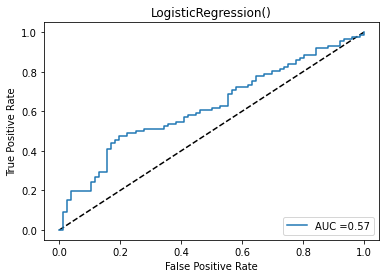

In [134]:
auc_roc(lr)

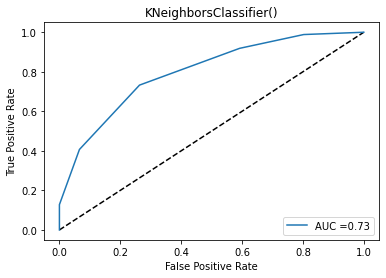

In [135]:
auc_roc(knn)

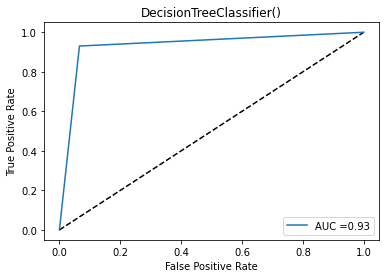

In [136]:
auc_roc(dtc)

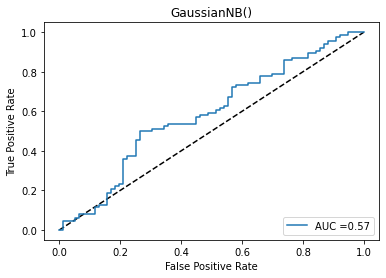

In [137]:
auc_roc(gnb)

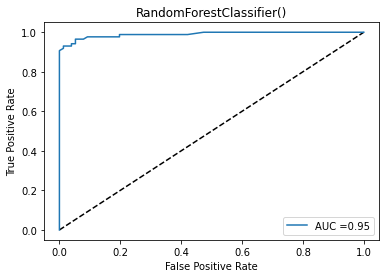

In [138]:
auc_roc(rfc)

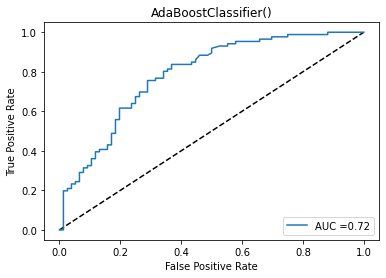

In [139]:
auc_roc(abc)

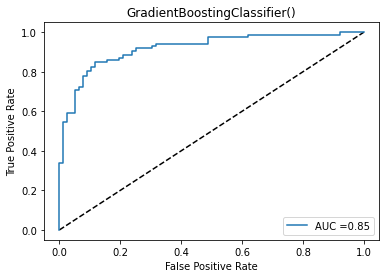

In [140]:
auc_roc(gbc)

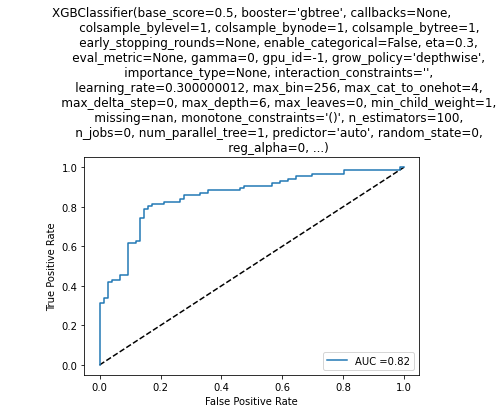

In [142]:
auc_roc(xgbc)

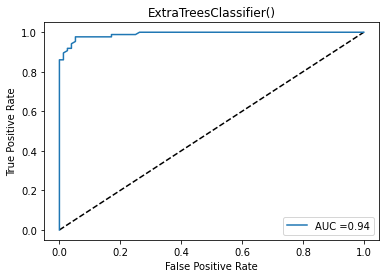

In [143]:
auc_roc(etc)

The RandomForest Classifier and ExtraTree Classifier is providing the maximum auc_roc score. The XGBoost Classifier is providing a auc roc score of 82%. Since the XGBoost Classifier(xgbc) model is performing well with all other tests, cross validations and tuning, we can consier this model as the best model.

### The XGBoost Classifier(xgbc) is providing the maximum accuracy score of 82.1%.

### Saving the Best Model

In [145]:
import pickle

filename = 'Loan application approval prediction model.pkl'
pickle.dump(xgbc,open(filename,'wb'))

### Conclusion

In [146]:
original = np.array(target_test)
predicted = np.round(np.array(xgbc.predict(features_test)),0)
df_prediction = pd.DataFrame({'Original Loan_Status':original,'Predicted Loan Status':predicted})
df_prediction.sample(10)

,Original Loan_Status,Predicted Loan Status
30,1,1
137,0,0
15,0,0
86,0,0
135,0,0
46,0,0
71,0,0
107,1,1
44,1,1
157,1,1


### Our xgbc model have is performing well with predictions without any errors. 

Now we can use this model to predict whether the loan of the applicant will be approved or not on the basis of the details provided below:

1. `Married`
2. `ApplicantIncome`
3. `CoapplicantIncome`
4. `LoanAmount`
5. `Loan_Amount_Term`
6. `Property_Area`
7. `Gender`
8.`Dependents`
9. `Education`
10. `Self_Employed`

### Predictive Model Created Successfully